In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df = pd.read_csv("C:/Users/rpatw/Downloads/Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**`replacing blanks with 0 as tenure is 0 and no total charges are recorded.`**

In [87]:
df.TotalCharges.replace(" ",0,inplace=True)

C:\Users\rpatw\AppData\Local\Temp\ipykernel_16432\3392547533.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.TotalCharges.replace(" ",0,inplace=True)


**`Changing the data type of 'TotalCharges' column to float.`**

In [88]:
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [90]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [91]:
df.duplicated().sum()

0

In [92]:
df['customerID'].duplicated().sum()

0

**`converting 0 and 1 values to no and yes in SeniorCitizen column`**

In [93]:
def conv(value):
    if value == 0:
        return "no"
    else:
        return "yes"

In [94]:
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [96]:
gb = df.groupby("Churn").agg({"Churn":"count"})
gb

,Churn
Churn,
No,5174
Yes,1869


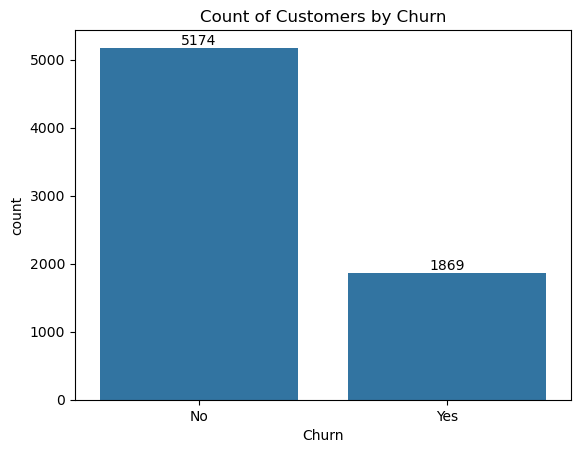

In [189]:
ax = sns.countplot(data=df,x='Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

# plt.bar(gb.index,gb['Churn'])

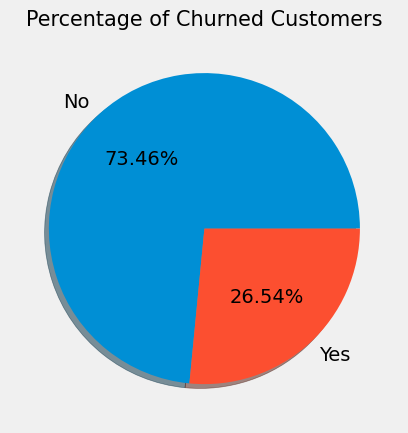

In [190]:
plt.style.use("fivethirtyeight")
plt.pie(gb['Churn'],labels = gb.index, autopct = '%1.2f%%',shadow=True)
plt.title("Percentage of Churned Customers",fontsize=15)
plt.show()

**`from the above pie chart we can conclude that 26.54% of our customers have churned out.`**
#### Let's find the reason behind it.

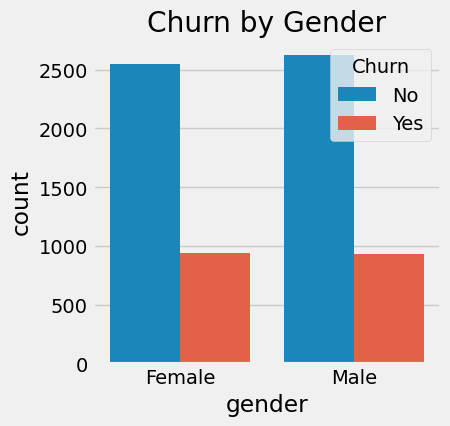

In [191]:
plt.figure(figsize=(4,4))
sns.countplot(data=df,x=df['gender'],hue="Churn")
plt.title("Churn by Gender")
plt.show()

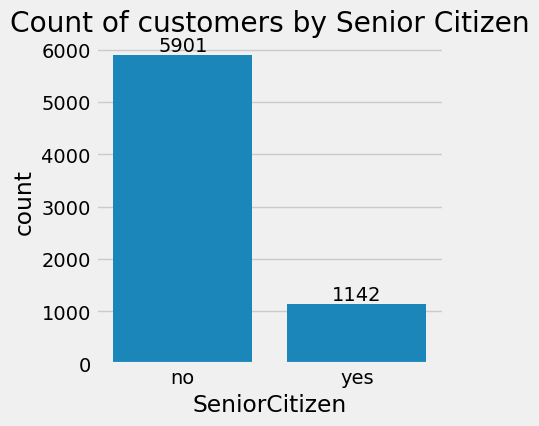

In [192]:
plt.figure(figsize=(4,4))
ax = sns.countplot(data=df,x=df['SeniorCitizen'])
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Senior Citizen")
plt.show()

<Figure size 400x400 with 0 Axes>

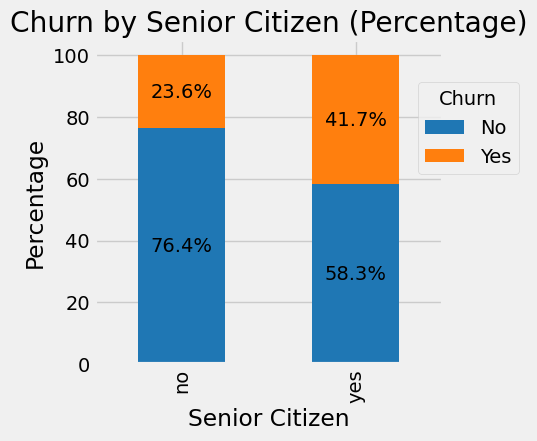

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame
# Calculate the percentage
df_total = df.groupby(['SeniorCitizen', 'Churn']).size().unstack().fillna(0)
df_percentage = df_total.div(df_total.sum(axis=1), axis=0) * 100

# Plotting
plt.figure(figsize=(4, 4))
ax = df_percentage.plot(kind='bar', stacked=True, figsize=(4, 4), color=['#1f77b4', '#ff7f0e'])
plt.title('Churn by Senior Citizen (Percentage)')
plt.ylabel('Percentage')
plt.xlabel('Senior Citizen')

# Annotate bars with percentage values
for p in ax.patches:
    width,height = p.get_width(),p.get_height()
    x,y = p.get_xy()
    ax.text(x+width/2,y+height/2,f'{height:.1f}%',ha='center',va='center')

plt.legend(title='Churn',bbox_to_anchor = (0.9,0.9))
plt.show()


comparitive a greater percentage of people in senior citizen category have churned 

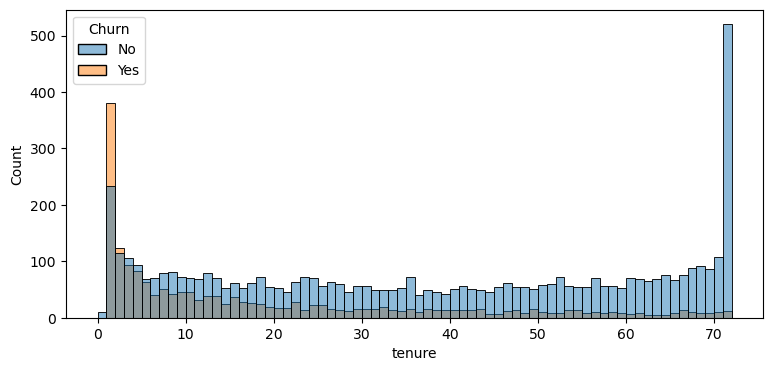

In [205]:
# plt.figure(figsize=(9, 4))
# plt.hist(df['tenure'],edgecolor = 'black',bins=72)
# plt.show()

plt.figure(figsize=(9,4))
sns.histplot(data = df, x = 'tenure',hue = 'Churn',bins = 72)

plt.show()


people who have used our services for a long time have stayed and people who have used for initial time have churned 

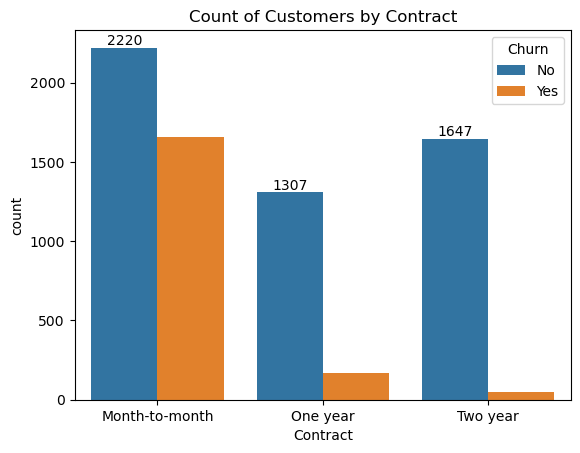

In [211]:
ax = sns.countplot(data = df, x = 'Contract',hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

pe0ple who have month-to-month contract are likely to churn then from those who have 1 or 2 year of contract

In [213]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'count'], dtype=object)

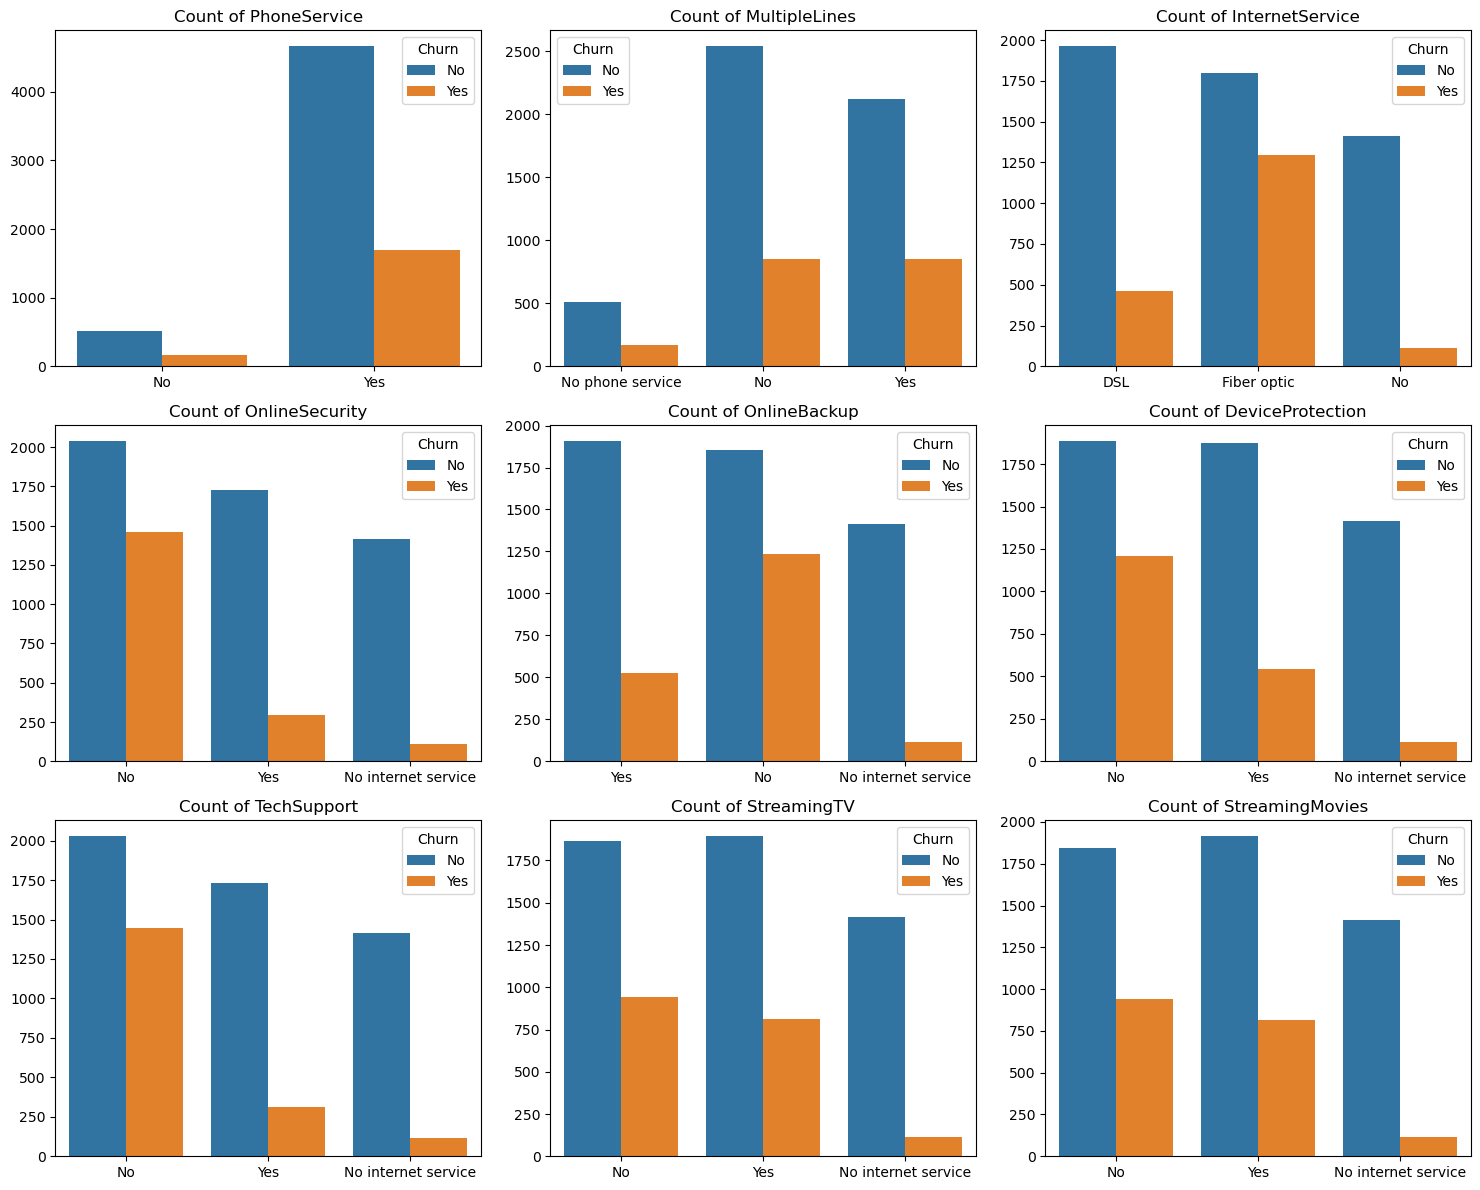

In [218]:
# Sample DataFrame setup (make sure df is your actual data)
# List of columns
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for subplots
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through columns and create a count plot for each
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i], hue='Churn')
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Customers without value-added services such as OnlineSecurity, TechSupport, and DeviceProtection have higher churn rates compared to those who have these services. Fiber optic internet users tend to churn more than DSL users. Lack of multiple lines or streaming services (TV/movies) also correlates with higher churn. Customers without internet service exhibit the lowest churn overall. Offering these additional services and improving customer support could help reduce churn rates.

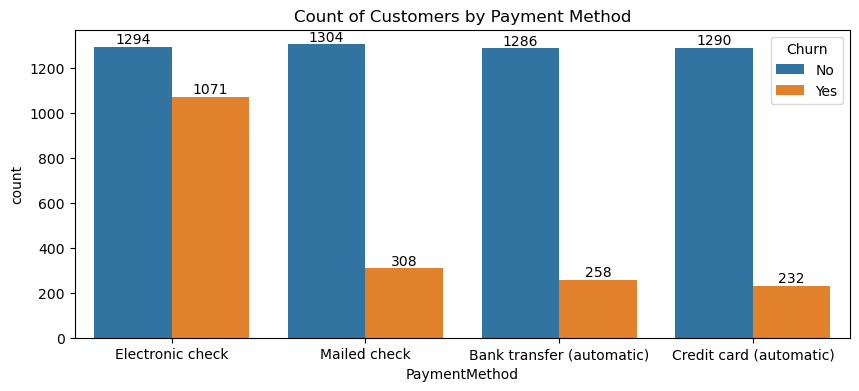

In [230]:
plt.figure(figsize=(10,4))
ax = sns.countplot(data = df, x = 'PaymentMethod',hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customers by Payment Method")

plt.show()

customer is likely to churn when he is using electronic check as payment method.